# Imports

In [1]:
import os
import sys

import pandas as pd

sys.path.append('..')
import medicc

In [2]:
%matplotlib inline

In [3]:
fst = medicc.io.read_fst()
data_folder = "../examples"

# 1) Simple example

In [4]:
##%% Load data from tsv table and run MEDICC
input_df = medicc.io.read_and_parse_input_data(os.path.join(data_folder, '../examples/simple_example/simple_example.tsv'))

sample_labels, pairwise_distances, nj_tree, final_tree, output_df, events_df = medicc.main(
    input_df,
    fst)


2024-08-07 14:56:48,466 - WARNING medicc.io:	Normal samples found in input data: ['taxon_4']


In [5]:
##%% Save files and plot tree and copy number track
medicc.io.write_tree_files(final_tree, os.path.join(data_folder, '../examples/output/simple_example_final_tree'))
output_df.to_csv(os.path.join(data_folder, '../examples/output/simple_example_output_df.tsv'), sep='\t')

fig = medicc.plot.plot_cn_profiles(
	output_df,
	final_tree,
	title="Simple Example",
	normal_name='diploid',
	tree_width_scale=1,
	track_width_scale=0.75,
	height_scale=1,
	hide_normal_chromosomes=False,
	label_func=lambda x: x.replace('_', ' ').replace('taxon', 'sample '))
fig.savefig(os.path.join(data_folder, '../examples/output/simple_example_cn_track.pdf'), bbox_inches='tight')

# 2) OV03-04

In [6]:
##%% Alternatively one can input fasta files containing the copy numbers (old MEDICC format)
input_df = medicc.io.read_and_parse_input_data(os.path.join(data_folder, '../examples/OV03-04/OV03-04_descr.txt'),
                                               input_type='fasta')


fasta_desc_file = pd.read_csv(os.path.join(data_folder, '../examples/OV03-04/OV03-04_descr.txt'), sep=' ', header=None)
fasta_desc_file.head()


2024-08-07 14:56:55,429 - WARNING medicc.io:	Normal samples found in input data: ['OV03-04_diploid']


,0,1,2
0,chr_01,OV03-04_chr01_major.fasta,OV03-04_chr01_minor.fasta
1,chr_02,OV03-04_chr02_major.fasta,OV03-04_chr02_minor.fasta
2,chr_03,OV03-04_chr03_major.fasta,OV03-04_chr03_minor.fasta
3,chr_04,OV03-04_chr04_major.fasta,OV03-04_chr04_minor.fasta
4,chr_05,OV03-04_chr05_major.fasta,OV03-04_chr05_minor.fasta


In [7]:
##%% Run MEDICC
sample_labels, pairwise_distances, nj_tree, final_tree, output_df, events_df = medicc.main(input_df, fst)

In [8]:
##%% Save files and plot tree and copy number track
medicc.io.write_tree_files(final_tree, os.path.join(data_folder, '../examples/output/OV03-04_final_tree'))
output_df.to_csv(os.path.join(data_folder, '../examples/output/OV03-04_output_df.tsv'), sep='\t')

fig = medicc.plot.plot_cn_profiles(
	output_df,
	final_tree,
	title="OV03-04",
	normal_name='diploid',
	tree_width_scale=1,
	track_width_scale=0.75,
	height_scale=1,
	hide_normal_chromosomes=False,
	label_func=lambda x: x.replace('_', ' ').replace('taxon', 'sample '))
fig.savefig(os.path.join(data_folder, '../examples/output/OV03-04_cn_track.pdf'), bbox_inches='tight')

2024-08-07 14:57:28,345 - WARNING medicc.plot:	More than 20 samples were provided. Creating the copy number tracks will take a long time to process and might crash. Best to use plot_cn_heatmap instead


# 3) WGD example

In [9]:
##%% Load data and run MEDICC
input_df = medicc.io.read_and_parse_input_data(os.path.join(data_folder, '../examples/WGD_example/WGD_example.tsv'))
sample_labels, pairwise_distances, nj_tree, final_tree, output_df, events_df = medicc.main(input_df, fst)

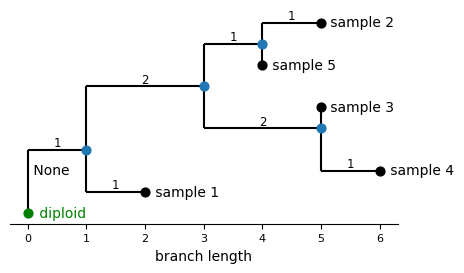

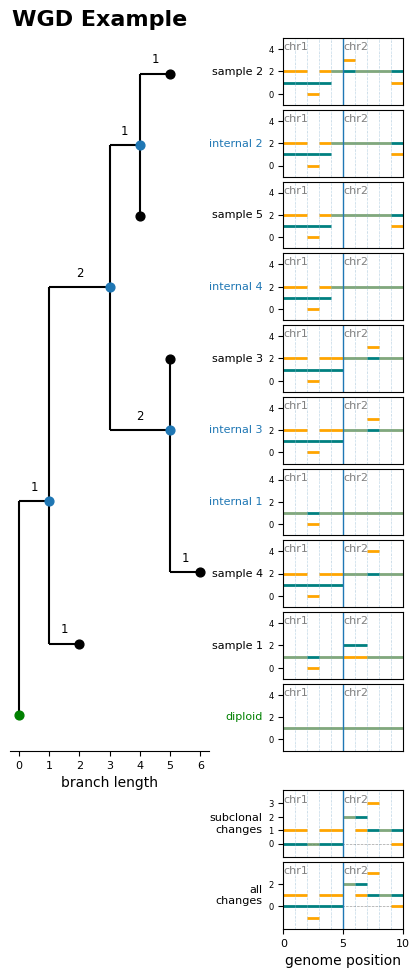

In [10]:
##%% Save files and plot tree and copy number track
medicc.io.write_tree_files(final_tree, os.path.join(data_folder, '../examples/output/WGD_example_final_tree'))
output_df.to_csv(os.path.join(data_folder, '../examples/output/WGD_example_output_df.tsv'), sep='\t')

fig = medicc.plot.plot_cn_profiles(
	output_df,
	final_tree,
	title="WGD Example",
	normal_name='diploid',
	tree_width_scale=1,
	track_width_scale=0.75,
	height_scale=1,
	hide_normal_chromosomes=False,
	label_func=lambda x: x.replace('_', ' ').replace('taxon', 'sample '))
fig.savefig(os.path.join(data_folder, '../examples/output/WGD_Example.pdf'), bbox_inches='tight')